<a href="https://colab.research.google.com/github/Ankita-lohakare/Brainwave_Matrix_Intern/blob/main/Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing Kaggle library
! pip install kaggle

Uploading kaggle.json file

In [ ]:

#configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Twitter Sentiment dataset

In [ ]:

# API to fetch the dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 77% 62.0M/80.9M [00:00<00:00, 223MB/s]
100% 80.9M/80.9M [00:00<00:00, 213MB/s]


In [ ]:
# extracting the compressed dataset

from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#printing the stopwords in English

print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Processing

In [ ]:
t_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding= 'ISO-8859-1')

In [ ]:
t_data.shape

(1599999, 6)

In [ ]:
t_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
#naming the columns and reading the dataset again

column_names = ['target', 'id','date','flag','user','text']
twitter_data = pd.read_csv('//content/training.1600000.processed.noemoticon.csv', names=column_names, encoding='iSO-8859-1')

In [ ]:
twitter_data.shape

(1600000, 6)

In [ ]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Word Cloud for Each Sentiment**

Word Cloud for Negative Tweets


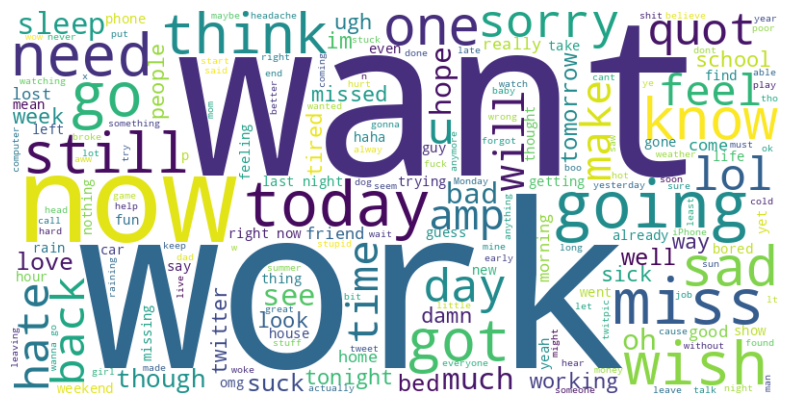

Word Cloud for Positive Tweets


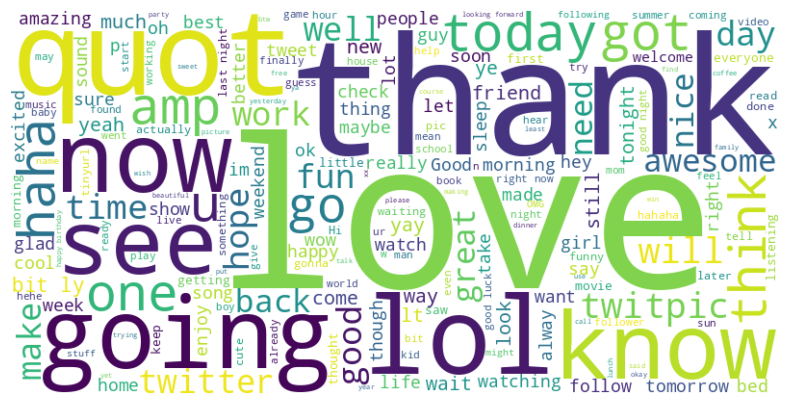

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud for each sentiment
for sentiment in twitter_data['Sentiment'].unique():
    sentiment_text = ' '.join(twitter_data[twitter_data['Sentiment'] == sentiment]['text'])  # Use 'text' column for word cloud
    print(f'Word Cloud for {sentiment} Tweets')
    generate_wordcloud(sentiment_text)

**Hashtag Analysis**

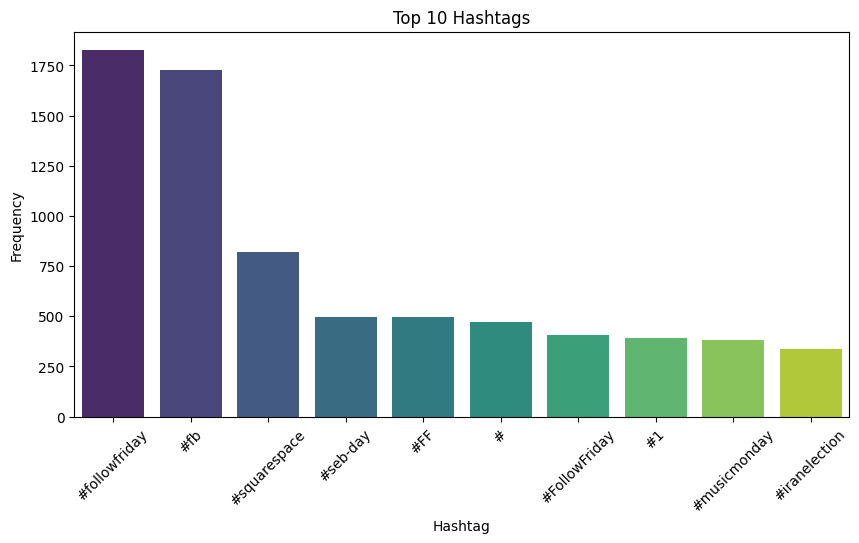

In [ ]:
# Function to extract hashtags
def extract_hashtags(text):
    return [word for word in text.split() if word.startswith('#')]

# Apply function and explode list to rows
twitter_data['Hashtags'] = twitter_data['text'].apply(extract_hashtags) # Changed 'Tweet' to 'text'
all_hashtags = twitter_data['Hashtags'].explode().dropna()

# Get the most common hashtags
common_hashtags = all_hashtags.value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=common_hashtags.index, y=common_hashtags.values, palette='viridis')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
twitter_data.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [ ]:
twitter_data['target'].value_counts()

,count
target,
0,800000
4,800000


converting the target from "4" to "1"

In [ ]:
twitter_data.replace({'target':{4:1}}, inplace =True)


0 --> Negative Tweet

1 --> Positive Tweet

**Sentiment Distribution**


<ipython-input-60-e2704513947f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


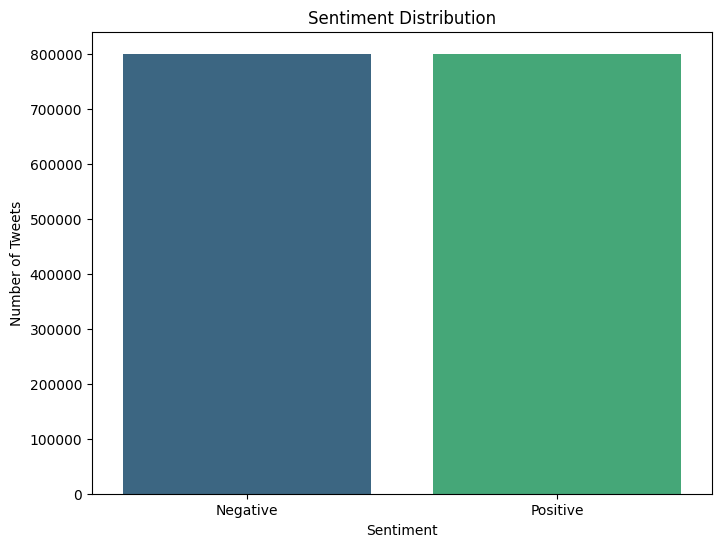

In [ ]:
# Assuming 'twitter_data' is a DataFrame containing the sentiment labels in the 'target' column
twitter_data['Sentiment'] = twitter_data['target'].map({0: 'Negative', 1: 'Positive'})  # Create a 'Sentiment' column
sentiment_counts = twitter_data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

Stemming

In [ ]:
port_steam = PorterStemmer()


In [ ]:

def stemming(content):
    stemmer = nltk.SnowballStemmer('english')
    stemmed_content = content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming) #50 min to wait for this execution


In [ ]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset can't updat facebook text it... might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@kenichan dive mani time ball. manag save 50% ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, behav all. mad. here? can..."


In [ ]:
print(twitter_data['stemmed_content'])

0          @switchfoot http://twitpic.com/2y1zl - awww, t...
1          upset can't updat facebook text it... might cr...
2          @kenichan dive mani time ball. manag save 50% ...
3                            whole bodi feel itchi like fire
4          @nationwideclass no, behav all. mad. here? can...
                                 ...                        
1599995                       woke up. school best feel ever
1599996    thewdb.com - cool hear old walt interviews! â...
1599997                      readi mojo makeover? ask detail
1599998    happi 38th birthday boo alll time!!! tupac ama...
1599999    happi #charitytuesday @thenspcc @sparkschar @s...
Name: stemmed_content, Length: 1600000, dtype: object


In [ ]:
print(twitter_data['target'])


0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [ ]:
# separating the data and label
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values


In [ ]:
print(X)

['@switchfoot http://twitpic.com/2y1zl - awww, that bummer. shoulda got david carr third day it. ;d'
 "upset can't updat facebook text it... might cri result school today also. blah!"
 '@kenichan dive mani time ball. manag save 50% rest go bound' ...
 'readi mojo makeover? ask detail'
 'happi 38th birthday boo alll time!!! tupac amaru shakur'
 'happi #charitytuesday @thenspcc @sparkschar @speakinguph4h']


In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


Splitting the data to train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(1600000,) (1280000,) (320000,)


In [ ]:
print(X_train)


['watch saw iv drink lil wine' '@hatermagazin in!'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 "hope everyon mother great day! can't wait hear guy store tomorrow!"
 'love wake folgers. bad voic deeper his.']


In [ ]:
print(Y_test)


[0 1 0 ... 1 0 1]


In [ ]:
print(type(X_train))


<class 'numpy.ndarray'>


In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train)


  (0, 547836)	0.2724618684273102
  (0, 452408)	0.3579598085710012
  (0, 253881)	0.5248770996321014
  (0, 166661)	0.3784258390024876
  (0, 311521)	0.42139878820156595
  (0, 555056)	0.44872071677182435
  (1, 225963)	0.9067471017719236
  (1, 246930)	0.4216748669629444
  (2, 166661)	0.46136477277006543
  (2, 184225)	0.19027374838761577
  (2, 513806)	0.1860264155402729
  (2, 190292)	0.291960339536279
  (2, 512826)	0.3201678621219188
  (2, 544237)	0.32797662458056626
  (2, 129186)	0.31180310787000864
  (2, 555463)	0.33615513831638094
  (2, 348922)	0.24083670228348006
  (2, 515944)	0.15260651817586954
  (2, 245500)	0.1610871849298624
  (2, 214505)	0.18696806053652665
  (2, 193530)	0.20185026966419675
  (2, 374825)	0.1668935707272662
  (3, 512826)	0.2889759419859781
  (3, 223669)	0.44799730952365047
  (3, 215707)	0.27664235108196045
  :	:
  (1279996, 493973)	0.21764105654450192
  (1279996, 473935)	0.3563021659537451
  (1279996, 315129)	0.5365721483013344
  (1279996, 315131)	0.5521525720337332


In [ ]:
print(X_test)


  (0, 55670)	0.17055177254735585
  (0, 74693)	0.16118353415737766
  (0, 117417)	0.26713376582199133
  (0, 162862)	0.37376133709318926
  (0, 193590)	0.25349565014652997
  (0, 200309)	0.23615264324054905
  (0, 238036)	0.28474121530713686
  (0, 354010)	0.4498316803743235
  (0, 363551)	0.17675365880596933
  (0, 491887)	0.2185991831237322
  (0, 504440)	0.3462299430969367
  (0, 515944)	0.3153930138698844
  (0, 529807)	0.17900942398484318
  (1, 45681)	0.30393306520623053
  (1, 55670)	0.20818991919184796
  (1, 208617)	0.5713191695769567
  (1, 291211)	0.406790936717856
  (1, 337340)	0.2840519213750515
  (1, 444653)	0.48181114184031076
  (1, 465891)	0.24406908706556932
  (2, 64378)	0.3536579461543279
  (2, 78463)	0.3787496131633456
  (2, 143581)	0.36246174089605776
  (2, 251871)	0.5874342825133929
  (2, 337430)	0.2586748312006373
  :	:
  (319995, 166746)	0.2770765657134576
  (319995, 219923)	0.2525141872087687
  (319995, 286452)	0.24442783940841878
  (319995, 309033)	0.2345072015395694
  (319995

**Training ML Model**

Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

**Model Evaluation**

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score on the training data :', training_data_accuracy)

Accuracy score on the training data : 0.803371875


In [ ]:
# accuracy score on the testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on the testing data :', test_data_accuracy)

Accuracy score on the testing data : 0.7810625


**Model accuracy = 78.2%**

# Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model

loaded_model = pickle.load(open('/content/trained_model.sav', 'rb'))

# **Predicition Examples from Test Data**

In [ ]:
X_new = X_test[158]
print(Y_test[158])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('Negative Tweet')

else:
  print('Positive Tweet')

1
[1]
Positive Tweet


In [ ]:
X_new = X_test[9]
print(Y_test[9])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('Negative Tweet')

else:
  print('Positive Tweet')

0
[0]
Negative Tweet


In [ ]:
X_new = X_test[10500]
print(Y_test[10500])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('Negative Tweet')

else:
  print('Positive Tweet')

1
[1]
Positive Tweet
